# Python Data Products for Predictive Analytics - Final Project

For this challenge, I will be developing a regression model to predict cars' fuel consumption in kilometers per liter. The dataset can be found in the following GitHub repository: [link to the repository](https://github.com/elloa/ocean-machineLearning2018/tree/master/problema1).

Additionally, I am working on a classification model that aims to predict expense categories based on previously labeled bank transaction data. This model will be implemented in my job, so I will be using a fictitious dataset.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Regression problem

## Car fuel consumption estimator  

### Reading regression model data 

In [2]:
data_auto = pd.read_csv("autompg.csv",sep = ";")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Basic data exploration

Looking for some answers:

1. How many samples has the dataset?
2. Which are the features for the problem we are trying to solve?
3. What are the cars names?
4. What's the fuel consumption mean, in miles per gallon, for the cars in the dataset?

In [3]:
len(data_auto)

406

In [4]:
len(data_auto['name'].unique())

312

In [5]:
#Which column will I use as features to predict
data_auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'name'],
      dtype='object')

In [6]:
#Cars names
data_auto['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
401              ford mustang gl
402                    vw pickup
403                dodge rampage
404                  ford ranger
405                   chevy s-10
Name: name, Length: 406, dtype: object

In [7]:
#Filtering data by specific name 
data_auto.loc[data_auto['name'] == "chevrolet camaro"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [8]:
#Fuel consumption mean (miles per gallon)
#1 mile = 1.6 km
np.mean(data_auto['mpg'])

23.514572864321607

Let's quickly review the data we'll be using to predict fuel consumption using the describe method.

In [9]:
data_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Plotting data distribution

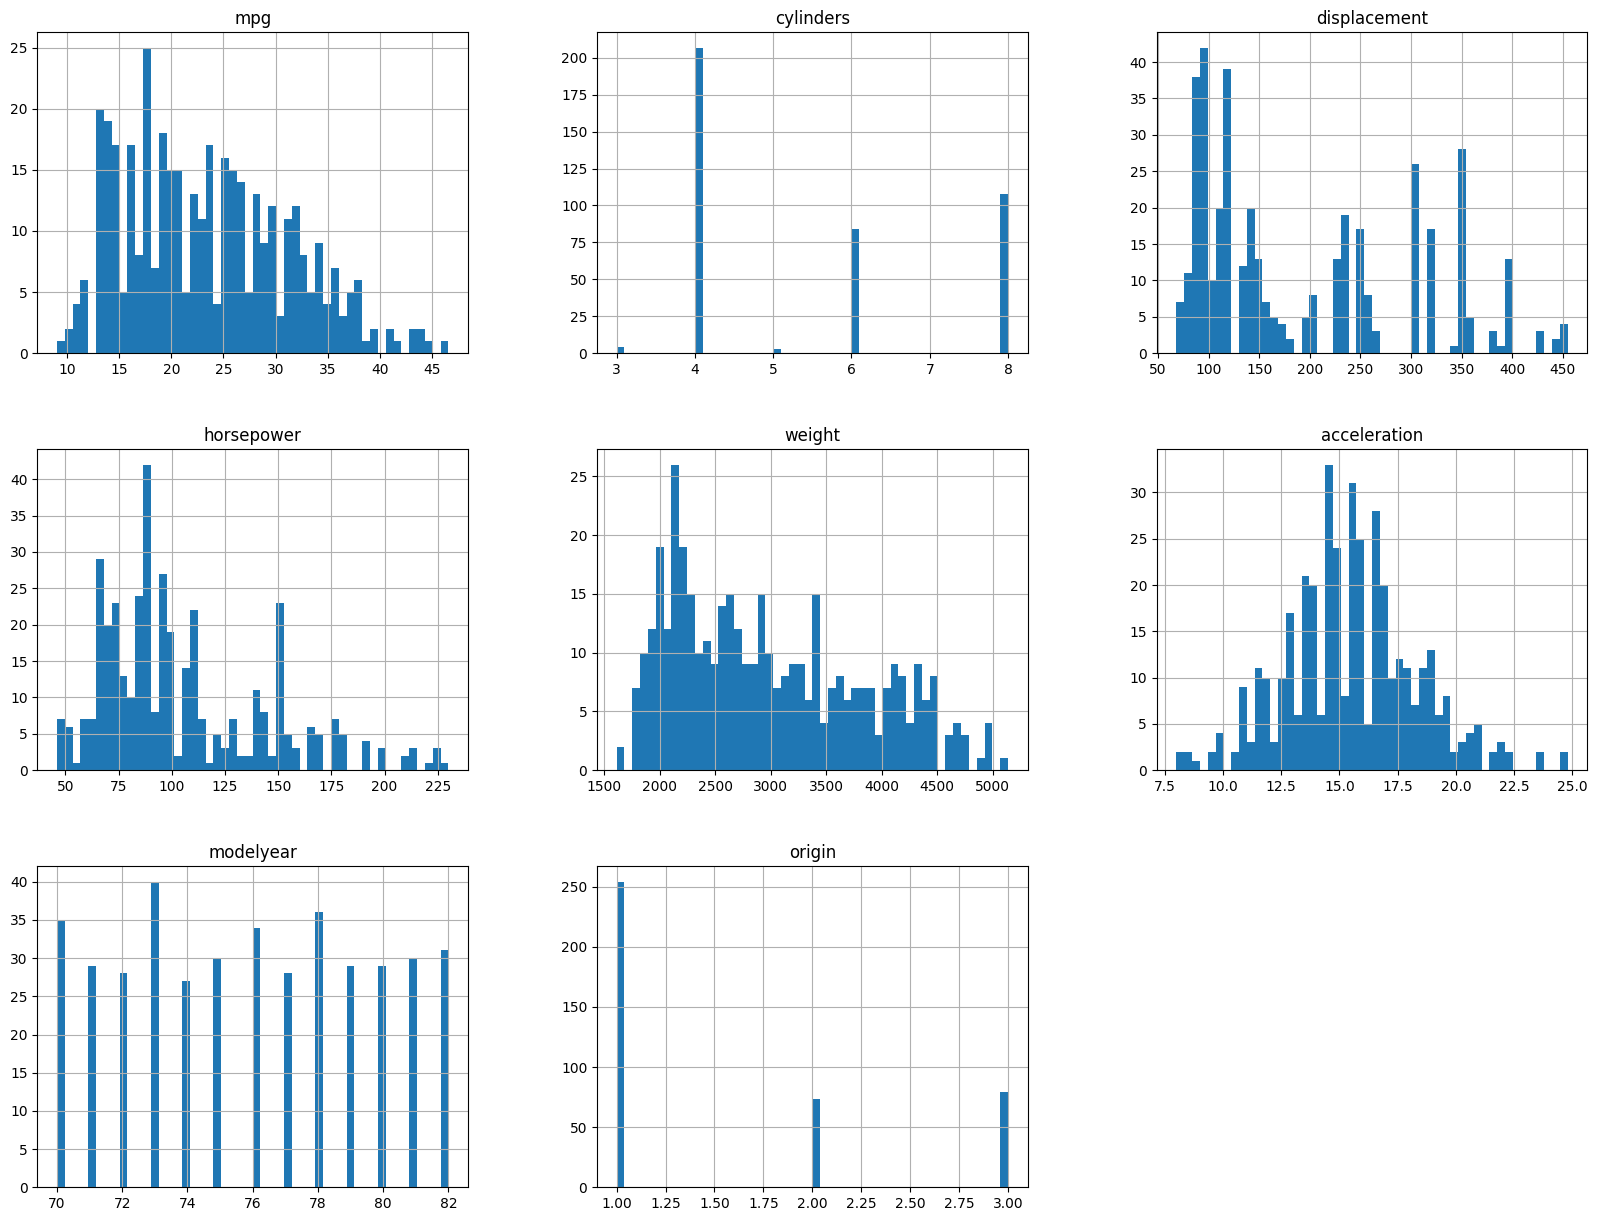

In [10]:
%matplotlib inline
data_auto.hist(bins=50, figsize=(20,15))
plt.show()

Looking for some correlation between features

In [11]:
corr_matrix = data_auto.corr()
corr_matrix["mpg"].sort_values(ascending=False)

C:\Users\natha\AppData\Local\Temp\ipykernel_11544\4291260374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_auto.corr()


mpg             1.000000
modelyear       0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

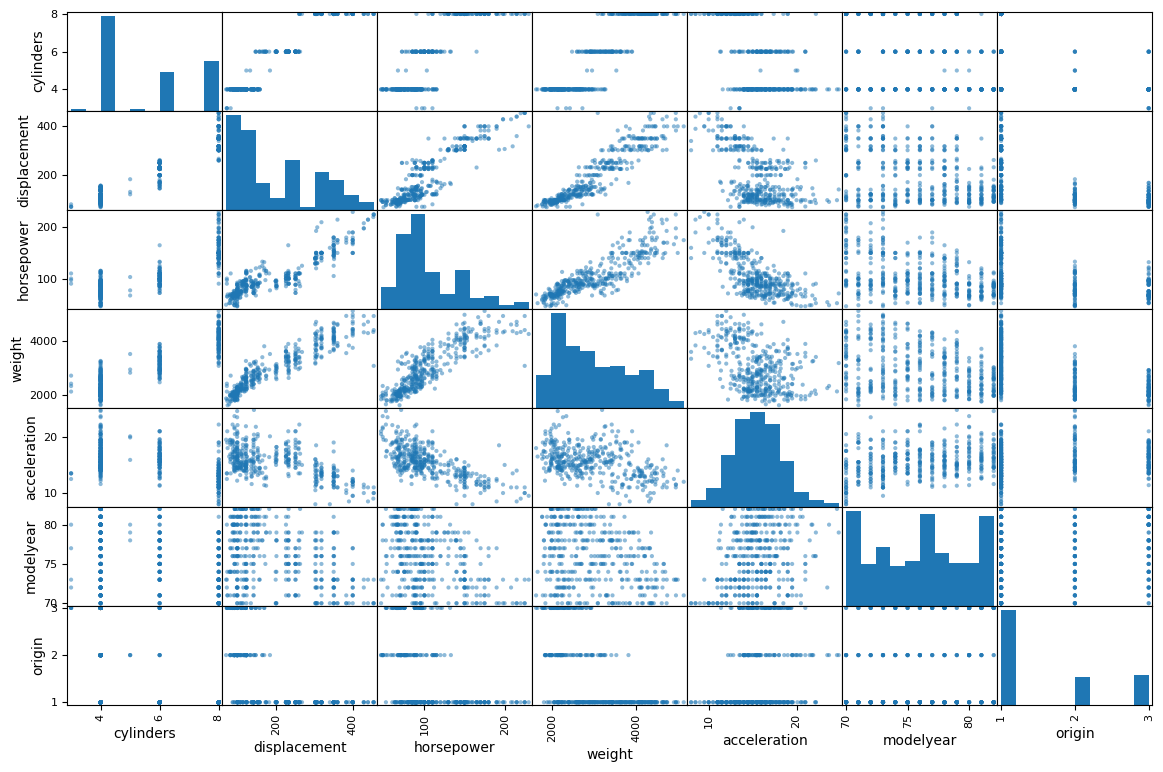

In [12]:
attributes = ["cylinders", "displacement", "horsepower",
              "weight","acceleration",'modelyear',"origin"]
scatter_matrix(data_auto[attributes], figsize=(14, 9));

### Data cleaning

In [13]:
#Deleting null values 
data_auto = data_auto.dropna()

In [14]:
#Deleting column 'name'
data_auto2 = data_auto.drop(['name'],axis = 1)
data_auto2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [15]:
#Converting a mile per gallon (US) measurement to a kilometer per liter measurement
#1 mpg  = 0.425 km/l
kml = [round(x*0.425,2) for x in data_auto2["mpg"]]

In [16]:
#Replacing column 'mpg'
data_auto2['km'] = kml
data_auto2 = data_auto2.drop(['mpg'],axis = 1)
data_auto2.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,km
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,7.22


### Selecting the prediction target and splitting training and testing data

In [17]:
#Selecting the prediction target
Y = data_auto2["km"]
#Selecting the features
data_auto2 = data_auto2.drop(["km"],axis = 1)
X = data_auto2
X.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [18]:
#Spliting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Model defining and fitting


In [19]:
#Define the model
regr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

# Fit the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(n_jobs=1)

### Model validation

Observing the model outputs for one testing data example

In [20]:
 X_test[2:3]

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
182,4.0,90.0,70.0,1937.0,14.0,75.0,2.0


In [21]:
Y_test.iloc[2]

12.32

In [22]:
test1 = X_test[2:3]
resultado = regr.predict(test1)
print(resultado,Y_test.iloc[2])

[12.30790165] 12.32


In [23]:
print("Making predictions of the fuel consumption per kilometer for the following 5 cars:")
print(X_test.head())
print("The predictions are")
print(regr.predict(X_test.head()))

Making predictions of the fuel consumption per kilometer for the following 5 cars:
     cylinders  displacement  horsepower  weight  acceleration  modelyear  \
49         8.0         383.0       180.0  4955.0          11.5       71.0   
36         4.0         140.0        90.0  2264.0          15.5       71.0   
182        4.0          90.0        70.0  1937.0          14.0       75.0   
363        4.0         108.0        75.0  2350.0          16.8       81.0   
131        8.0         350.0       180.0  3664.0          11.0       73.0   

     origin  
49      1.0  
36      1.0  
182     2.0  
363     3.0  
131     1.0  
The predictions are
[ 2.92838531  9.71927024 12.30790165 14.05543511  6.71262737]


### Model evaluation

Calculating mean squared error where, the closer to 0, the better the model is 

In [24]:
Y_prediction = regr.predict(X_test)
mse = mean_squared_error(Y_prediction,Y_test)
mse

1.9865549121453758

In [25]:
Y_train_prediction = regr.predict(X_train)
mse_train = mean_squared_error(Y_train_prediction,Y_train)
mse

1.9865549121453758

Calculating the coefficient of determination: 1 is perfect prediction

In [26]:
r2 = r2_score(Y_prediction,Y_test)
r2

0.778303813882507

Calculating Mean Absolute Error

In [27]:
# get predicted kilometer per liter mean absolute error on validation data 
print(mean_absolute_error(Y_test, Y_prediction))

1.023463337134796


### Calculating and visualizing absolute error

The diference between the testing set and predicted data. Next, the plot shows that data aglomerates near the origin line, reinforcing the model is making good predictions.

In [28]:
residual = []
for (x,y) in zip(Y_test,Y_prediction):
    residual.append((x-y)**2)
residual

[4.715910371262952,
 4.755582306982422,
 0.00014637012462771938,
 0.08147319924597732,
 4.172326554646057,
 0.0008905474327452775,
 0.731938531892335,
 0.20487935256403336,
 0.004355822045971695,
 0.11001133287891013,
 0.2102918025237255,
 0.2074040990883342,
 0.30535710865228805,
 4.364179829872055,
 0.5846351000280101,
 2.55902292059165,
 2.0682397396575727,
 3.375855318045495,
 0.9850722249898729,
 0.3923423644057112,
 0.03563188230154047,
 0.007200553418915151,
 0.08775907230715656,
 5.179359286798993,
 1.6337750394674886,
 0.0001646522850028208,
 1.4771559902570557,
 1.1192097507238303,
 0.34793459374984836,
 3.452596386760626,
 0.016953040487868713,
 0.021900121274707685,
 0.6735308880097649,
 0.09336209726222908,
 0.0991971712934534,
 3.2042609588366116,
 1.134864927470226,
 1.347988235023055,
 0.00399397155204787,
 4.9252625715829765,
 0.10612032313479675,
 0.054687056849725774,
 1.9467650420785896,
 1.5919930740265722,
 1.2118279573450248,
 0.009031514187355524,
 1.06398811922

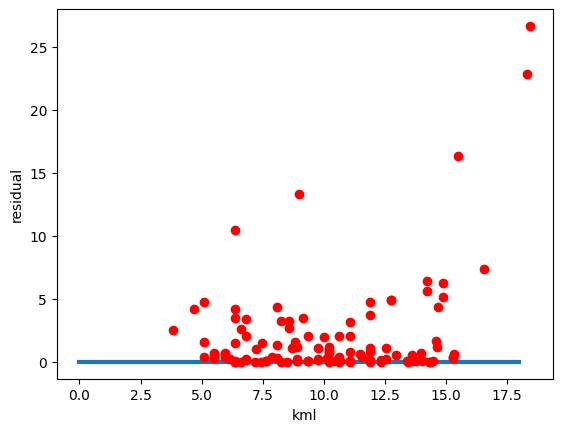

In [29]:
x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test,residual,'ro')
plt.ylabel('residual')
plt.xlabel('kml')
plt.show()

### Testing K-Nearest Neighbors

In [30]:
#Define and fit the model
kneig = KNeighborsRegressor(n_neighbors=5)
kneig.fit(X_train,Y_train)

KNeighborsRegressor()

In [31]:
#Mean Squared Error KNN
Y_predictionKNeig = kneig.predict(X_test)
mse_kneig = mean_squared_error(Y_predictionKNeig,Y_test)
mse_kneig

3.0108777288135604

In [32]:
#Mean absolute error for training set
Y_predictionKNeig_train = kneig.predict(X_train)
print(mean_absolute_error(Y_train, Y_predictionKNeig_train))

1.0993868613138686


In [33]:
#Mean absolute error for test set
print(mean_absolute_error(Y_test, Y_predictionKNeig))

1.2420169491525423


In [34]:
#Calculating residuals from K-Nearest Neighbors model
residual_K = []
for (x,y) in zip(Y_test,Y_predictionKNeig):
    residual_K.append((x-y)**2)
residual_K

[0.006724000000000121,
 0.12110400000000053,
 0.6432039999999993,
 2.637376000000002,
 5.522500000000003,
 0.13542400000000024,
 11.957764000000001,
 4.8664360000000215,
 1.1620840000000006,
 0.09241600000000016,
 0.015876000000000084,
 3.849444000000006,
 4.376464000000009,
 9.449475999999999,
 2.1904000000000012,
 2.347023999999999,
 2.903616000000002,
 0.2600999999999998,
 0.39942399999999845,
 0.7534240000000005,
 1.4160999999999988,
 0.9292959999999991,
 2.010724000000003,
 18.67968400000001,
 4.4605440000000005,
 0.012996000000000377,
 0.13987600000000042,
 0.00032400000000002457,
 1.1406239999999992,
 0.09241600000000016,
 1.2859560000000008,
 0.04752399999999921,
 0.8611840000000015,
 0.17305599999999882,
 0.36481599999999903,
 1.6000000000010685e-05,
 7.997584000000007,
 8.526399999999999,
 0.12110399999999928,
 8.952063999999995,
 0.031683999999999976,
 0.6723999999999976,
 0.2401000000000002,
 0.006724000000000121,
 0.1474559999999989,
 0.0009000000000000682,
 0.509795999999

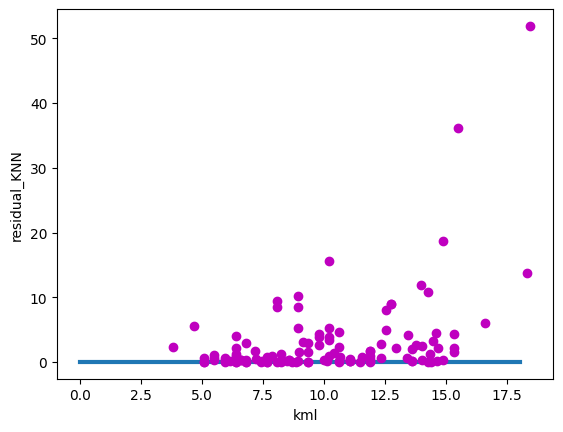

In [35]:
x_knn = [0,int(max(Y_test))]
y_knn = [0,0]
plt.plot(x_knn,y_knn,linewidth=3)
plt.plot(Y_test,residual_K,'mo')
plt.ylabel('residual_KNN')
plt.xlabel('kml')
plt.show()

Observing the two models and its respectives evaluations, it is possible to affirm that the regression model is  better to predict the fuel consumption based on the features selected.

# Classification problem

In this problem I'm using a ficticious dataframe with bank transactions and it's previous classifications

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [76]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [77]:
import os
import pygsheets

### Manipulating Google Sheets API

In [78]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/spreadsheets',
         'https://www.googleapis.com/auth/drive.file',
         'https://www.googleapis.com/auth/drive']

# Reading Credentails from ServiceAccount Keys file
credentials = ServiceAccountCredentials.from_json_keyfile_name('final-project-data-products.json'
                                                               , scope)

# intitialize the authorization object            
gc = gspread.authorize(credentials)

In [79]:
# Access a specific worksheet within the document
sheet = gc.open('final_project_db_classification_problem').sheet1

In [80]:
# Get all values from the worksheet
classification_dataframe = pd.DataFrame(sheet.get_all_records())

number of samples

In [81]:
len(classification_dataframe)

1074

In [82]:
classification_dataframe.columns

Index(['Date', 'Transaction', 'Transaction_details', 'credit amt', 'debit amt',
       'Origin', 'Category', 'Category_labels'],
      dtype='object')

Using regex to normalize transaction description data

In [83]:
import re

### Data preprocessing

In [84]:
def limpar_string(texto):
    # Usando expressão regular para substituir caracteres não-alfabéticos por espaços em branco
    texto_limpo = re.sub('[^a-zA-Z]', ' ', texto)
    return texto_limpo

In [85]:
classification_dataframe['Transaction'] = classification_dataframe['Transaction'].apply(limpar_string).str.strip()
classification_dataframe['Transaction_details'] = classification_dataframe['Transaction_details'].astype(str).apply(limpar_string).str.strip()

#### One-hot-encoding

In [86]:
classification_dataframe['Transaction_cod'] = pd.factorize(classification_dataframe['Transaction'])[0]
classification_dataframe['Transaction_details_cod'] = pd.factorize(classification_dataframe['Transaction_details'])[0]
classification_dataframe['Origin_cod'] = pd.factorize(classification_dataframe['Origin'])[0]
classification_dataframe['debit amt_cod'] = classification_dataframe['debit amt'].str.strip().apply(lambda x: 1 if x!='' else 0)
classification_dataframe['credit amt_cod'] = classification_dataframe['credit amt'].str.strip().apply(lambda x: 1 if x!='' else 0)
classification_dataframe['target'] = pd.factorize(classification_dataframe['Category'])[0]

In [87]:
classification_dataframe.columns

Index(['Date', 'Transaction', 'Transaction_details', 'credit amt', 'debit amt',
       'Origin', 'Category', 'Category_labels', 'Transaction_cod',
       'Transaction_details_cod', 'Origin_cod', 'debit amt_cod',
       'credit amt_cod', 'target'],
      dtype='object')

In [88]:
classification_dataframe= classification_dataframe.dropna()

In [128]:
labels_list = classification_dataframe['target'].drop_duplicates().tolist()

In [129]:
labels_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [89]:
classification_dataframe[['Category','Category_labels','target']].drop_duplicates().reset_index(drop=True)

,Category,Category_labels,target
0,4.12,Other Administrative Expenses,0
1,6.2,Accounting,1
2,4.6,Appliance Maintenance,2
3,9.1,Bank Fees,3
4,7.1,Bonuses,4
5,1.1,Cash Receipt,5
6,4.9,Cleaning Supplies,6
7,4.3,Electricity,7
8,6.1,Financial and Results,8
9,4.5,Internet/Cable TV,9


#### Selecting features and prediction target 

In [92]:
X = classification_dataframe[['Transaction_cod',
       'Transaction_details_cod', 'Origin_cod', 'debit amt_cod',
       'credit amt_cod']]
y = classification_dataframe['target']

Combine the preprocessed variables into the feature matrix

In [93]:
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(X)

### Split the data into training and testing sets

In [94]:
##  (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Support Vector Classifier

In [95]:
# Initialize an SVM classifier
svm_classifier = SVC(kernel='linear') 
# Train the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [96]:
# Make predictions on the test set
y_pred_svc = svm_classifier.predict(X_test)

#### Model Validation - SVM 

In [97]:
print("Predictions of corresponding labels to bank transactions:")
print(X_test.head())
print("The predictions are")
print(svm_classifier.predict(X_test.head()))

Predictions of corresponding labels to bank transactions:
     Transaction_cod  Transaction_details_cod  Origin_cod  debit amt_cod  \
542               61                       67           1              0   
370               27                      149           1              1   
307               48                      126           1              1   
493                4                      149           1              1   
350               49                      139           1              1   

     credit amt_cod  
542               1  
370               0  
307               0  
493               0  
350               0  
The predictions are
[20 19 19 19 19]


In [98]:
X_test.head()

,Transaction_cod,Transaction_details_cod,Origin_cod,debit amt_cod,credit amt_cod
542,61,67,1,0,1
370,27,149,1,1,0
307,48,126,1,1,0
493,4,149,1,1,0
350,49,139,1,1,0


In [99]:
y_test.head()

542    20
370    19
307    17
493    19
350    18
Name: target, dtype: int64

In [101]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svc)
report_svm = classification_report(y_test, y_pred_svc)

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: Undefi

In [102]:
accuracy_svm

0.8697674418604651

In [103]:
report_svm

'              precision    recall  f1-score   support\n\n           0       0.75      1.00      0.86         3\n           1       1.00      1.00      1.00         1\n           3       1.00      1.00      1.00         4\n           4       1.00      1.00      1.00         1\n           5       1.00      1.00      1.00        13\n           6       0.80      0.67      0.73         6\n           8       0.00      0.00      0.00         0\n           9       0.00      0.00      0.00         0\n          11       1.00      1.00      1.00         9\n          12       1.00      0.50      0.67         2\n          13       1.00      0.89      0.94         9\n          14       0.00      0.00      0.00         2\n          15       0.00      0.00      0.00         1\n          16       0.00      0.00      0.00         6\n          17       0.00      0.00      0.00         5\n          18       0.83      0.62      0.71         8\n          19       0.61      0.87      0.72        31\n       

## Random Forest Classifier

In [104]:
# Initialize and train the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

#### Model Validation - Random Forest

In [106]:
print("Predictions of corresponding labels to bank transactions:")
print(X_test.head(10))
print("The predictions are")
print(random_forest_model.predict(X_test.head(10)))

Predictions of corresponding labels to bank transactions:
     Transaction_cod  Transaction_details_cod  Origin_cod  debit amt_cod  \
542               61                       67           1              0   
370               27                      149           1              1   
307               48                      126           1              1   
493                4                      149           1              1   
350               49                      139           1              1   
237                4                       90           1              1   
475                4                      149           1              1   
578               63                       67           1              0   
462                4                      142           1              1   
978               71                       67           1              0   

     credit amt_cod  
542               1  
370               0  
307               0  
493              

In [107]:
y_test.head(10)

542    20
370    19
307    17
493    19
350    18
237    13
475    19
578    20
462    19
978    28
Name: target, dtype: int64

In [134]:
len(labels_list)

31

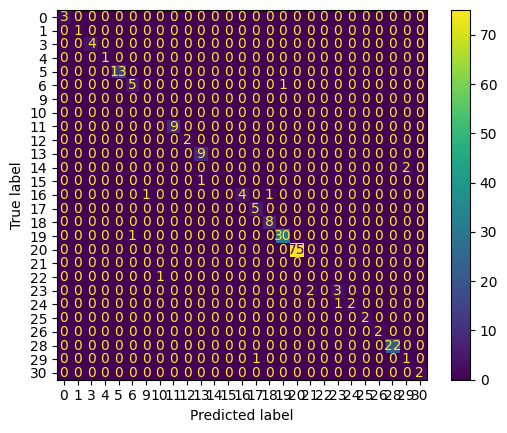

In [140]:
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test, y_test)
plt.show()

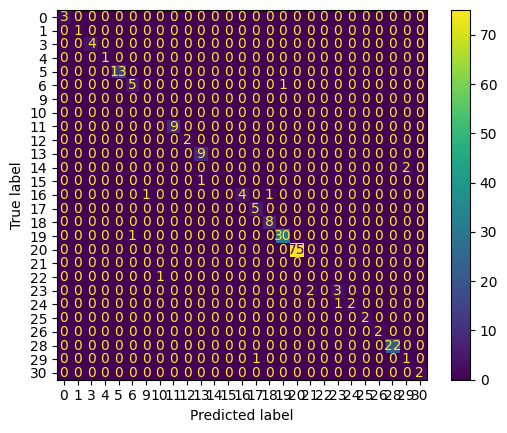

In [141]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

In [133]:
confusion_matrix(y_test,y_pred_rf, labels=labels_list)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  

In [131]:
len(y_pred_rf)

215

In [110]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.94


## Cross-validation

Cross-validation provides a more robust assessment of the models' performance because it considers how they perform on different subsets of the data.

In [85]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cross_val_scores_rf = cross_val_score(random_forest_model, X, y, cv=5, scoring='accuracy')

# Cross-validation for SVM
cross_val_scores_svm = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Results:")
print(f"Random Forest: {cross_val_scores_rf.mean():.2f} (± {cross_val_scores_rf.std():.2f})")
print(f"SVM: {cross_val_scores_svm.mean():.2f} (± {cross_val_scores_svm.std():.2f})")

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Results:
Random Forest: 0.80 (± 0.03)
SVM: 0.61 (± 0.02)
